# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

Saving IMG_6980.jpg to IMG_6980.jpg


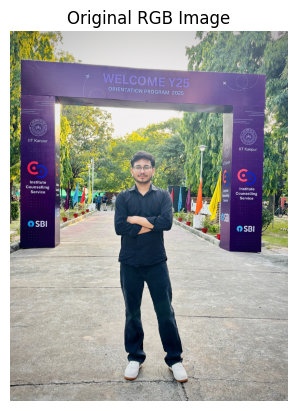

RGB Image Shape: (5712, 4284, 3)
Grayscale Shape: (5712, 4284)


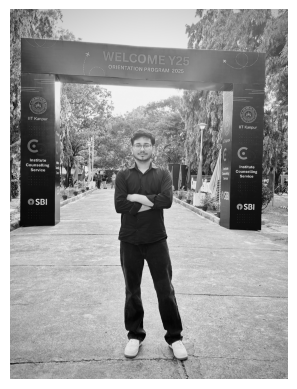

OpenCV Grayscale Shape: (5712, 4284)

Sample Pixel Comparison:
(0,0) RGB = [177 162  33], NumPy Gray = 151, CV2 Gray = 152
(50,50) RGB = [127 134 100], NumPy Gray = 128, CV2 Gray = 128
(100,100) RGB = [ 91 108  66], NumPy Gray = 98, CV2 Gray = 98


In [1]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Upload image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load image in RGB
img = np.array(Image.open(filename).convert("RGB"))

# Display RGB image
plt.imshow(img)
plt.axis("off")
plt.title("Original RGB Image")
plt.show()
print("RGB Image Shape:", img.shape)

# NumPy grayscale (weighted sum)
weights = np.array([0.299, 0.587, 0.114])
gray_np = np.dot(img[...,:3], weights).astype(np.uint8)

plt.imshow(gray_np, cmap="gray")
plt.axis("off")
print("Grayscale Shape:", gray_np.shape)

# OpenCV grayscale conversion
gray_cv = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_cv, cmap='gray')
plt.axis("off")
plt.show()

print("OpenCV Grayscale Shape:", gray_cv.shape)
#compare pixels

print("\nSample Pixel Comparison:")
for r, c in [(0,0), (50,50), (100,100)]:
    if r < img.shape[0] and c < img.shape[1]:
        print(f"({r},{c}) RGB = {img[r,c]}, "
              f"NumPy Gray = {gray_np[r,c]}, "
              f"CV2 Gray = {gray_cv[r,c]}")



## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [2]:
#  FFT and store fshift
import numpy as np
from PIL import Image

# grayscale array exists (uint8).
try:
    gray_np
except NameError:
    try:
        filename
        img = np.array(Image.open(filename).convert("RGB"))
        gray_np = (img @ [0.299, 0.587, 0.114]).astype(np.uint8)
        print("Constructed gray_np from uploaded filename.")
    except NameError:
        raise RuntimeError("No gray_np or filename found. Run Part A first.")

# Convert to float32 for FFT
img_f = gray_np.astype(np.float32, copy=False)

# Compute 2D FFT and shift DC to center
F = np.fft.fft2(img_f)
fshift = np.fft.fftshift(F)

# fshift is stored
print("B1 done. Stored fshift. Shapes -> gray:", gray_np.shape, " fshift:", fshift.shape)


import numpy as np
import matplotlib.pyplot as plt

USE_DB = False
CENTER_ZOOM = 64
EPS = 1e-12


try:
    fshift
    gray_np
except NameError:

    try:
        from PIL import Image
        filename  # may raise NameError
        img = np.array(Image.open(filename).convert("RGB"))
        gray_np = (img @ [0.299, 0.587, 0.114]).astype(np.uint8)
        fshift = np.fft.fftshift(np.fft.fft2(gray_np.astype(np.float32)))
        print("Fallback: constructed gray_np and fshift from filename.")
    except NameError:
        raise RuntimeError("fshift or gray_np not found. Run B1 first or upload image.")



B1 done. Stored fshift. Shapes -> gray: (5712, 4284)  fshift: (5712, 4284)


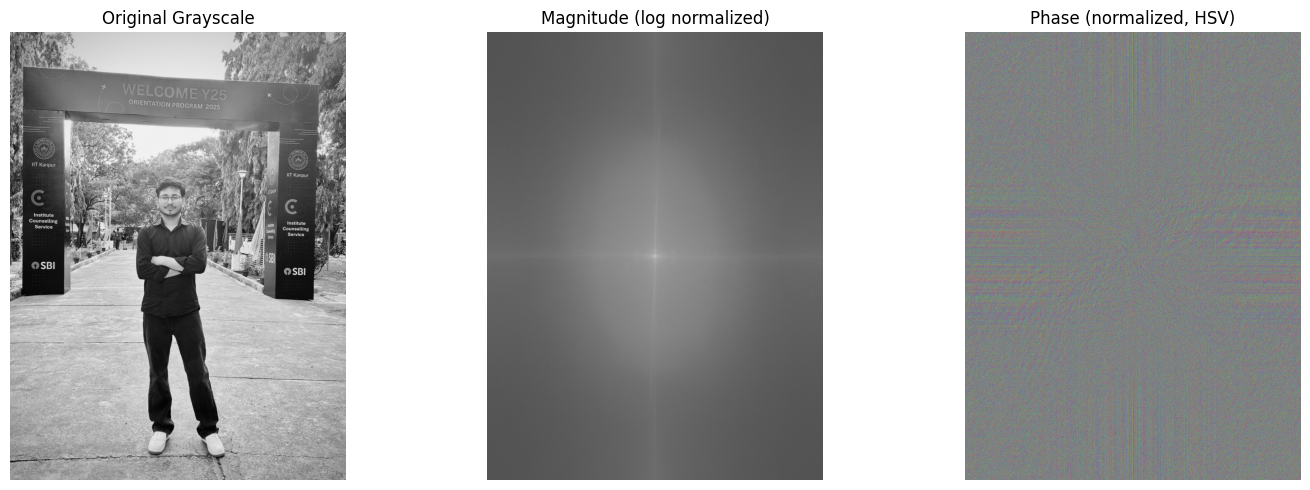

gray_np shape: (5712, 4284), dtype: uint8
fshift shape: (5712, 4284), dtype: complex64
Magnitude: min 1.051e+00, max 3.512e+09
Magnitude percentiles (log-scaled view): 5% 7.371e+00, 50% 9.147e+00, 95% 1.234e+01
Phase range (rad): -3.142 .. 3.142


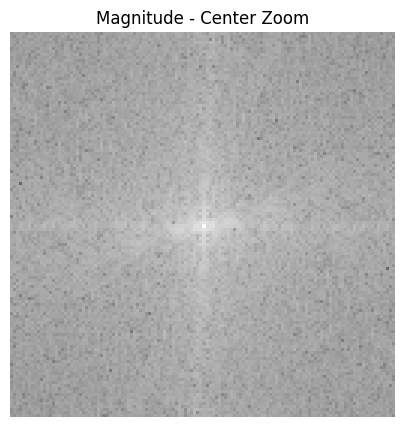

In [3]:
# magnitude and phase
magnitude = np.abs(fshift)
phase = np.angle(fshift)

# display magnitude
if USE_DB:
    mag_disp_raw = 20.0 * np.log10(magnitude + EPS)
else:
    mag_disp_raw = np.log1p(magnitude)

# Normalize to [0,1]
minv = mag_disp_raw.min()
maxv = mag_disp_raw.max()
den = (maxv - minv) if (maxv > minv) else 1.0
mag_disp = (mag_disp_raw - minv) / den

# Phase normalized to [0,1]
phase_disp = (phase + np.pi) / (2.0 * np.pi)

# original grayscale, magnitude, phase
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(gray_np, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Original Grayscale")
axs[0].axis('off')

axs[1].imshow(mag_disp, cmap='gray', vmin=0, vmax=1)
axs[1].set_title("Magnitude (log normalized)" if not USE_DB else "Magnitude (dB normalized)")
axs[1].axis('off')

axs[2].imshow(phase_disp, cmap='hsv', vmin=0, vmax=1)
axs[2].set_title("Phase (normalized, HSV)")
axs[2].axis('off')

plt.tight_layout()
plt.show()

print(f"gray_np shape: {gray_np.shape}, dtype: {gray_np.dtype}")
print(f"fshift shape: {fshift.shape}, dtype: {fshift.dtype}")
print(f"Magnitude: min {magnitude.min():.3e}, max {magnitude.max():.3e}")
print("Magnitude percentiles (log-scaled view):",
      f"5% {np.percentile(mag_disp_raw,5):.3e}, 50% {np.percentile(mag_disp_raw,50):.3e}, 95% {np.percentile(mag_disp_raw,95):.3e}")
print(f"Phase range (rad): {phase.min():.3f} .. {phase.max():.3f}")

# center zoom
H, W = gray_np.shape
if CENTER_ZOOM and H > 2 and W > 2:
    cH, cW = H // 2, W // 2
    z = int(max(1, min(CENTER_ZOOM, min(cH, cW))))
    y0, y1 = max(0, cH - z), min(H, cH + z)
    x0, x1 = max(0, cW - z), min(W, cW + z)
    plt.figure(figsize=(5,5))
    plt.imshow(mag_disp[y0:y1, x0:x1], cmap='gray', vmin=0, vmax=1)
    plt.title("Magnitude - Center Zoom")
    plt.axis('off')
    plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

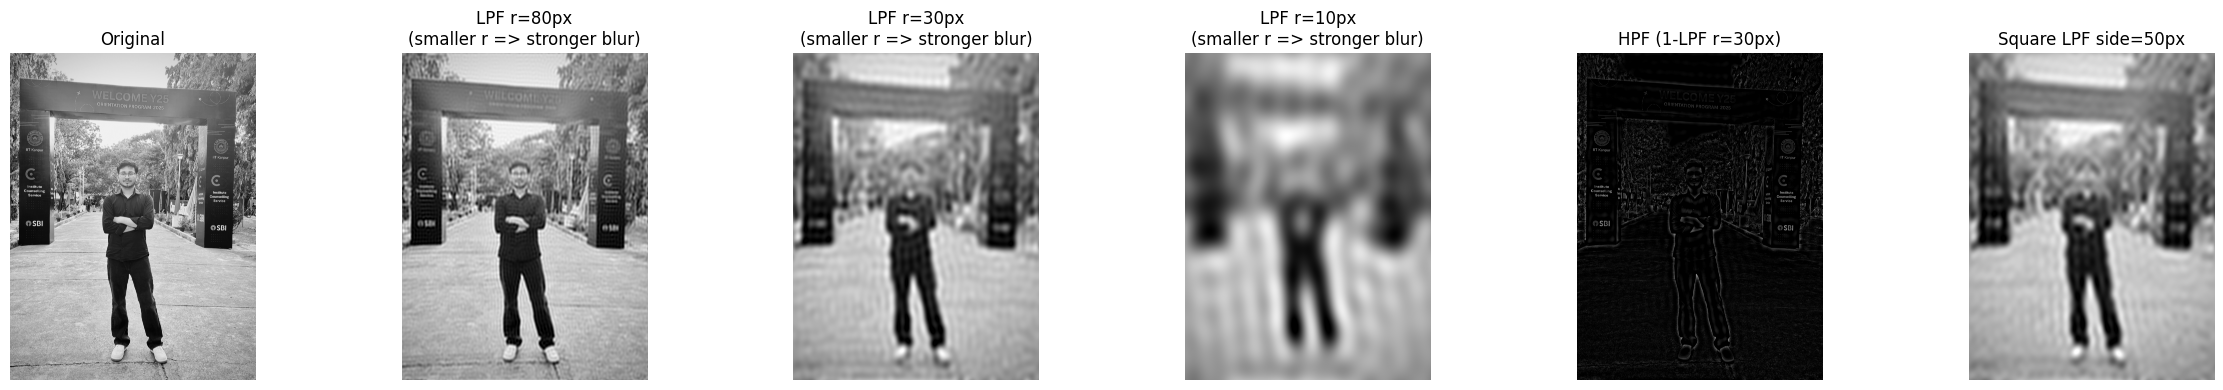

MSE (recon vs original):
  LPF r= 80 px -> MSE = 623.438
  LPF r= 30 px -> MSE = 862.855
  LPF r= 10 px -> MSE = 1330.375
  HPF r= 30 px  -> MSE = 21449.473
  Square side= 50 -> MSE = 901.097


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Parameters
PREFERRED_RADII = [10, 30, 80]
SQUARE_SIDE = 50
HPF_CHOICE_INDEX = 1
EPS = 1e-12

try:
    gray_np
    fshift
except NameError:
    try:
        filename
        img = np.array(Image.open(filename).convert("RGB"))
        gray_np = (img @ [0.299, 0.587, 0.114]).astype(np.uint8)
        fshift = np.fft.fftshift(np.fft.fft2(gray_np.astype(np.float32)))
        print("Fallback: constructed gray_np and fshift from filename.")
    except NameError:
        raise RuntimeError("No gray_np/fshift and no filename found. Run Part A/B1 first.")

H, W = gray_np.shape
cH, cW = H // 2, W // 2

# Precompute distance^2 grid
Y = np.arange(H, dtype=np.int32)[:, None]
X = np.arange(W, dtype=np.int32)[None, :]
dist2 = (Y - cH)**2 + (X - cW)**2

# Scale radii if too large
max_allowed = min(cH, cW)
radii = []
for r in PREFERRED_RADII:
    if r <= 0: continue
    if r > max_allowed:
        scaled = max(1, int(max_allowed * (r / max(PREFERRED_RADII))))
        radii.append(scaled)
    else:
        radii.append(int(r))
# unique & sort largest->smallest for display (less blur -> more blur)
radii = sorted(list(dict.fromkeys(radii)), reverse=True)
n_lp = len(radii)


def reconstruct(mask):
    """Apply mask on centered fshift and return uint8 reconstruction."""
    F_masked = fshift * mask
    recon = np.fft.ifft2(np.fft.ifftshift(F_masked))
    recon_real = np.real(recon)
    return np.clip(recon_real, 0, 255).astype(np.uint8), recon_real

def circular_mask(r):
    return (dist2 <= (int(r)**2)).astype(np.float32)

def square_mask(side):
    half = max(1, int(side)//2)
    m = np.zeros((H,W), dtype=np.float32)
    y0, y1 = max(0, cH-half), min(H, cH+half)
    x0, x1 = max(0, cW-half), min(W, cW+half)
    m[y0:y1, x0:x1] = 1.0
    return m

def mse(a,b):
    return float(np.mean((a.astype(np.float32)-b.astype(np.float32))**2))

#  apply circular LPFs
c1_results = []
for r in radii:
    mask = circular_mask(r)
    recon_u8, recon_real = reconstruct(mask)
    c1_results.append((r, mask, recon_u8, recon_real))

# HPF = 1 - LPF (use middle radius)
hp_idx = min(max(0, HPF_CHOICE_INDEX), max(0, n_lp-1))
hp_radius = radii[hp_idx] if n_lp>0 else max(1, int(min(H,W)/8))
lpf_mid = circular_mask(hp_radius)
hpf_mask = (1.0 - lpf_mid).astype(np.float32)
hpf_u8, hpf_real = reconstruct(hpf_mask)

# centered square LPF
sq_mask = square_mask(SQUARE_SIDE)
sq_u8, sq_real = reconstruct(sq_mask)


cols = max(1, n_lp + 3)
plt.figure(figsize=(4*cols, 4))

idx = 1
# Original
plt.subplot(1, cols, idx); idx += 1
plt.imshow(gray_np, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')

# LPF reconstructions
for (r, mask, recon_u8, recon_real) in c1_results:
    plt.subplot(1, cols, idx); idx += 1
    plt.imshow(recon_u8, cmap='gray', vmin=0, vmax=255)
    plt.title(f"LPF r={r}px\n(smaller r => stronger blur)")
    plt.axis('off')

# HPF
plt.subplot(1, cols, idx); idx += 1
plt.imshow(hpf_u8, cmap='gray', vmin=0, vmax=255)
plt.title(f"HPF (1-LPF r={hp_radius}px)")
plt.axis('off')

# Square LPF
plt.subplot(1, cols, idx); idx += 1
plt.imshow(sq_u8, cmap='gray', vmin=0, vmax=255)
plt.title(f"Square LPF side={SQUARE_SIDE}px")
plt.axis('off')

plt.tight_layout()
plt.show()

#  Metrics
print("MSE (recon vs original):")
for r, mask, recon_u8, recon_real in c1_results:
    print(f"  LPF r={r:3d} px -> MSE = {mse(recon_u8, gray_np):.3f}")
print(f"  HPF r={hp_radius:3d} px  -> MSE = {mse(hpf_u8, gray_np):.3f}")
print(f"  Square side={SQUARE_SIDE:3d} -> MSE = {mse(sq_u8, gray_np):.3f}")



## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

MSE (reconstruction vs original):
  Phase-only (fshift/|f|)    : 24721.766
  Phase-only (exp(1j*angle)) : 24721.766
  Magnitude-only (zero phase) : 5121.579

Max diff between phase specs: 3.039e-07
Max diff between phase reconstructions: 2.401e-09


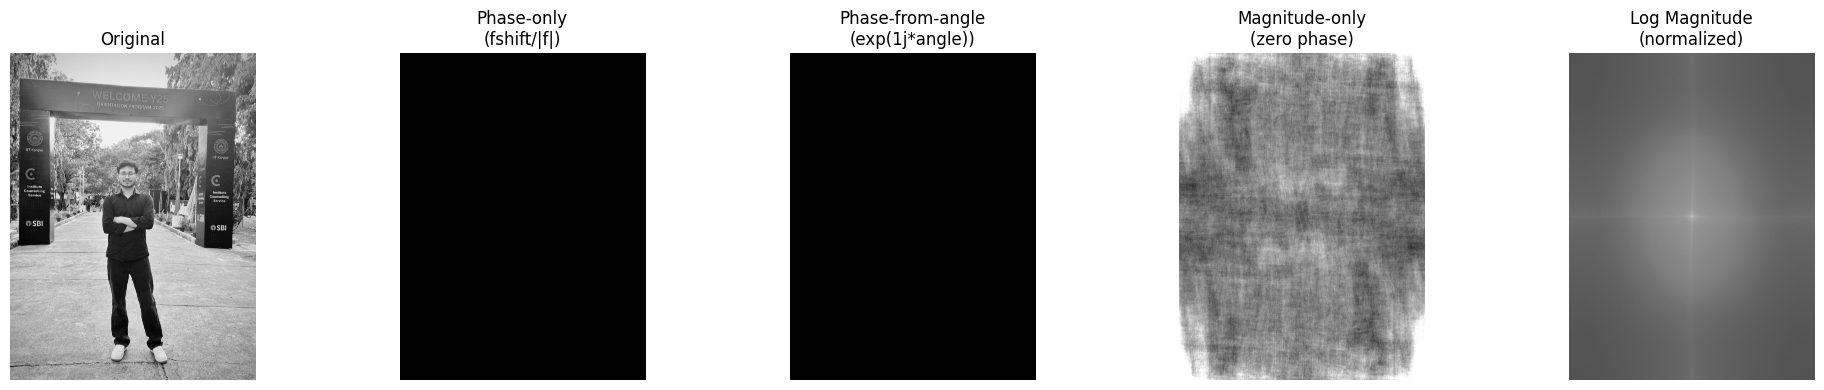


Observations

1) Phase-only reconstruction:
   - Using phase-only spectrum (fshift/|fshift| or exp(1j*angle)) preserves image structure surprisingly well: edges,
     object outlines and spatial layout remain visible. This is because phase encodes positional alignment of sinusoidal
     components — the relative shifts of sinusoids that combine to form edges and structures.
   - Numerically, fshift / (|fshift| + EPS) is equivalent to exp(1j*angle) except at bins where |fshift|==0.
     We used a tiny EPS to avoid division-by-zero. The max difference between both methods is ~3.039e-07 (numerical noise).

2) Difference between np.angle(fshift) and the reconstruction line:
   - np.angle(fshift) returns real angles. To reconstruct you must turn angles into complex phasors via exp(1j*angle).
     Directly inverse-FFT-ing the raw angle array (without exp) is meaningless for spectral reconstruction.

3) Magnitude-only reconstruction:
   - Setting phase to zero (keeping only magnitude) remove

In [5]:
#Phase-only and Magnitude-only Reconstructions

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#Parameters
EPS = 1e-12
CLIP_MIN, CLIP_MAX = 0, 255

# fshift & gray_np
try:
    fshift
    gray_np
except NameError:
    try:
        filename
        img = np.array(Image.open(filename).convert("RGB"))
        gray_np = (img @ [0.299, 0.587, 0.114]).astype(np.uint8)
        fshift = np.fft.fftshift(np.fft.fft2(gray_np.astype(np.float32)))
        print("Fallback constructed gray_np and fshift from uploaded filename.")
    except NameError:
        raise RuntimeError("Need fshift and gray_np. Run B1 or upload image first.")

# inverse reconstruct from centered complex spectrum
def reconstruct_centered(F_centered):
    """Given centered complex spectrum (fshift-like), return (recon_real_float, recon_uint8)."""
    # inverse shift -> ifft2 -> real part
    recon = np.fft.ifft2(np.fft.ifftshift(F_centered))
    recon_real = np.real(recon)
    recon_u8 = np.clip(recon_real, CLIP_MIN, CLIP_MAX).astype(np.uint8)
    return recon_real, recon_u8

#  magnitude and angle
magnitude = np.abs(fshift)
angle = np.angle(fshift)


# Phase-only reconstruction

# Method A
phase_only_spec = fshift / (magnitude + EPS)   # equals exp(1j*angle) for nonzero magnitude

# Reconstruct
recon_phase_real_A, recon_phase_u8_A = reconstruct_centered(phase_only_spec)

# Method B
phase_from_angle_spec = np.exp(1j * angle)     # mathematically identical except at |f|==0
recon_phase_real_B, recon_phase_u8_B = reconstruct_centered(phase_from_angle_spec)

# Numerical check between the two phase-only methods
phase_spec_maxdiff = float(np.max(np.abs(phase_only_spec - phase_from_angle_spec)))
recon_phase_maxdiff = float(np.max(np.abs(recon_phase_real_A - recon_phase_real_B)))


mag_only_spec = magnitude.copy()

# Reconstruct
recon_mag_real, recon_mag_u8 = reconstruct_centered(mag_only_spec)


mag_log = np.log1p(magnitude)
mag_log_norm = (mag_log - mag_log.min()) / (mag_log.max() - mag_log.min() + 1e-12)


def mse(a, b):
    return float(np.mean((a.astype(np.float32) - b.astype(np.float32))**2))

mse_phaseA = mse(recon_phase_u8_A, gray_np)
mse_phaseB = mse(recon_phase_u8_B, gray_np)
mse_mag    = mse(recon_mag_u8, gray_np)

print("MSE (reconstruction vs original):")
print(f"  Phase-only (fshift/|f|)    : {mse_phaseA:.3f}")
print(f"  Phase-only (exp(1j*angle)) : {mse_phaseB:.3f}")
print(f"  Magnitude-only (zero phase) : {mse_mag:.3f}")
print()
print(f"Max diff between phase specs: {phase_spec_maxdiff:.3e}")
print(f"Max diff between phase reconstructions: {recon_phase_maxdiff:.3e}")


fig, axs = plt.subplots(1, 5, figsize=(20, 4))

axs[0].imshow(gray_np, cmap='gray', vmin=CLIP_MIN, vmax=CLIP_MAX)
axs[0].set_title("Original")
axs[0].axis('off')

axs[1].imshow(recon_phase_u8_A, cmap='gray', vmin=CLIP_MIN, vmax=CLIP_MAX)
axs[1].set_title("Phase-only\n(fshift/|f|)")
axs[1].axis('off')

axs[2].imshow(recon_phase_u8_B, cmap='gray', vmin=CLIP_MIN, vmax=CLIP_MAX)
axs[2].set_title("Phase-from-angle\n(exp(1j*angle))")
axs[2].axis('off')

axs[3].imshow(recon_mag_u8, cmap='gray', vmin=CLIP_MIN, vmax=CLIP_MAX)
axs[3].set_title("Magnitude-only\n(zero phase)")
axs[3].axis('off')

axs[4].imshow(mag_log_norm, cmap='gray', vmin=0, vmax=1)
axs[4].set_title("Log Magnitude\n(normalized)")
axs[4].axis('off')

plt.tight_layout()
plt.show()



report = f"""
Observations

1) Phase-only reconstruction:
   - Using phase-only spectrum (fshift/|fshift| or exp(1j*angle)) preserves image structure surprisingly well: edges,
     object outlines and spatial layout remain visible. This is because phase encodes positional alignment of sinusoidal
     components — the relative shifts of sinusoids that combine to form edges and structures.
   - Numerically, fshift / (|fshift| + EPS) is equivalent to exp(1j*angle) except at bins where |fshift|==0.
     We used a tiny EPS to avoid division-by-zero. The max difference between both methods is ~{phase_spec_maxdiff:.3e} (numerical noise).

2) Difference between np.angle(fshift) and the reconstruction line:
   - np.angle(fshift) returns real angles. To reconstruct you must turn angles into complex phasors via exp(1j*angle).
     Directly inverse-FFT-ing the raw angle array (without exp) is meaningless for spectral reconstruction.

3) Magnitude-only reconstruction:
   - Setting phase to zero (keeping only magnitude) removes positional information, so the reconstructed image looks like
     low-frequency blobs dominated by DC and smooth variation; edges/details are lost.
   - The magnitude spectrum has a very wide dynamic range: a few low-frequency bins dominate. Taking logarithm (log1p or log10)
     compresses this range so small but perceptually important frequency components become visible when displaying the spectrum.
     This is why the plotted "Log Magnitude" looks different (more informative) than the raw magnitude image.
"""
print(report)

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

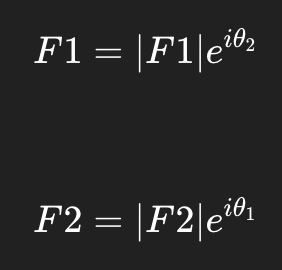

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.